### <center> Linear Models

In [2]:
# import important libraries : 
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression : 

### The Theory :  

Let the training data $S = \{ (x_1, y_i) \}_{i=0}^{m}$, where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$

<u><b>The purpose :</b></u> 

Is to find a regressor $h_s$, in the linear regression algorithm : 

$$ h_s(x) = w^T.x$$

> Note :
> 
> $w \in \mathbb{R}^{d+1}$, because we include the bias $w_0$, by including $1$ in sample $x = [1, x_1, ..., x_d ]$

Let define the Loss function, in regression problems, specially in Linear Regression, we consider:

$$ L_s(h_s) = \frac{1}{m} \sum_{i = 1}^{m} (y_i - w^T.x_i)^2 $$

The optimal $w^*$ is given by : 

$$ w^* = \arg\min_{w \in \mathbb{R}^{d+1}} L_s(h_s) =  \arg\min_{w \in \mathbb{R}^{d+1}} \frac{1}{m} \sum_{i = 1}^{m} (w^T.x_i - y_i)^2 $$

o solve this problem, we calculate the gradient of the objective function and
compare it to zero : 

$$ \nabla{L_s(h_s)} = \frac{2}{m} \sum_{i = 1}^{m} (w^T.x_i - y_i).x_i$$


### Prepare Data : 

In [86]:
data = np.loadtxt("./linreg.csv", delimiter=',')

In [87]:
data[:10]

array([[ 0.37553646, -2.22354342],
       [ 0.65627652, -1.40123569],
       [ 0.71311158, -1.44500759],
       [ 0.65702952, -1.63459466],
       [ 0.56116442, -1.70293105],
       [ 0.05526398, -2.60199084],
       [ 0.55730574, -1.62237506],
       [ 0.77161704, -1.17947639],
       [ 0.94616233, -0.98599069],
       [ 0.64218085, -1.63081888]])

In [88]:
X_train, y_train = data[:, 0], data[:, 1]

### plot dataset

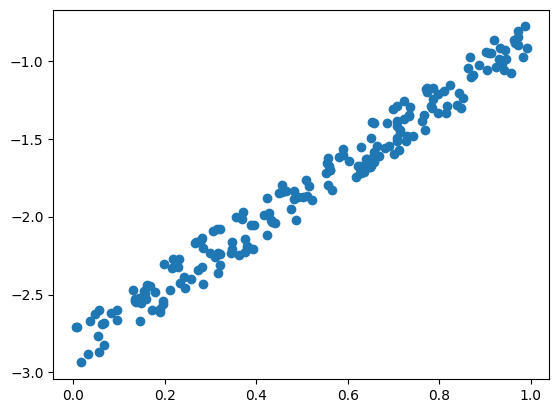

In [89]:
plt.scatter(X_train, y_train)

### Build Model : 

In [232]:
class LinearRegression:

    def __init__(self, lr=0.01, Tmax = 100,  eps=0.2, name = "Linear Regression"):
        self.lr = lr
        self.eps = eps
        self.w : np.ndarray 
        self.lossHist : list = []
        self.name = name
        self.ls : float
        self.Tmax = Tmax
        
    def hs(self, xi):
        return self.w @ xi

    def loss(self, X, y):
        return (1/len(X)) * sum((y[i] - self.hs(xi))**2 for i, xi in enumerate(X))

    def grad(self, X, y):
        return (2/len(X)) * sum((self.hs(xi) - y[i])*xi for i, xi in enumerate(X))

    def _dataVal(self, X, y):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        return np.block([np.ones((X.shape[0], 1)), X]), y

    def fit(self, X, y):
        
        X, y = self._dataVal(X, y)
        
        m , d = X.shape
        
        self.w = np.random.rand(d)
        
        self.lossHist.append(self.loss(X, y))

        self.ls = self.loss(X, y)

        t = 0

        for i in range(self.Tmax):
            self.w -= self.lr * self.grad(X, y)

            self.ls = self.loss(X, y)
            
            t += 1     
            if t%10==0:
                self.lossHist.append(self.ls)
                print(f"iter : {t} ,loss : {self.ls}")

    def summary(self):
        print(f"======== {self.name} model summary : ", "="*50)
        print(f" weights : {self.w}")
        print(f" loss : {self.ls}")
        print(f"\nplot the loss : ")
        plt.plot(range(0, len(self.lossHist)), self.lossHist) 

In [233]:
lg = LinearRegression(lr=0.1, Tmax = 1000)

In [234]:
lg.fit(X_train, y_train)

iter : 10 ,loss : [0.41883597]
iter : 20 ,loss : [0.32510301]
iter : 30 ,loss : [0.25899362]
iter : 40 ,loss : [0.20668637]
iter : 50 ,loss : [0.16528329]
iter : 60 ,loss : [0.13251123]
iter : 70 ,loss : [0.10657093]
iter : 80 ,loss : [0.08603823]
iter : 90 ,loss : [0.06978583]
iter : 100 ,loss : [0.05692146]
iter : 110 ,loss : [0.04673883]
iter : 120 ,loss : [0.03867891]
iter : 130 ,loss : [0.03229918]
iter : 140 ,loss : [0.02724939]
iter : 150 ,loss : [0.0232523]
iter : 160 ,loss : [0.02008845]
iter : 170 ,loss : [0.01758414]
iter : 180 ,loss : [0.01560189]
iter : 190 ,loss : [0.01403287]
iter : 200 ,loss : [0.01279093]
iter : 210 ,loss : [0.01180789]
iter : 220 ,loss : [0.01102978]
iter : 230 ,loss : [0.01041387]
iter : 240 ,loss : [0.00992636]
iter : 250 ,loss : [0.00954047]
iter : 260 ,loss : [0.00923503]
iter : 270 ,loss : [0.00899327]
iter : 280 ,loss : [0.0088019]
iter : 290 ,loss : [0.00865042]
iter : 300 ,loss : [0.00853052]
iter : 310 ,loss : [0.00843562]
iter : 320 ,loss : 

In [235]:
lg.w

array([-2.83429682,  1.97051176])

======== Linear Regression model summary :  ==================================================
 weights : [-2.83429682  1.97051176]
 loss : [0.00807527]

plot the loss : 


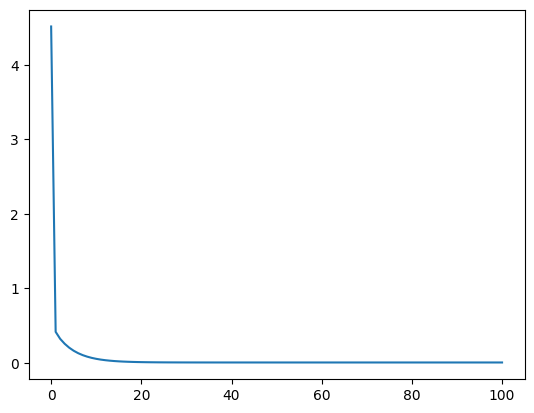

In [236]:
lg.summary()

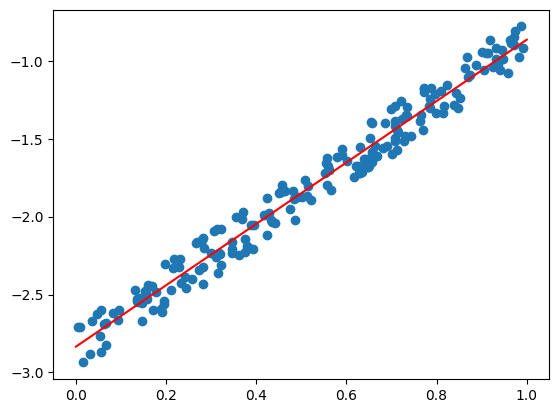

In [224]:
t = np.linspace(0, 1, 100)
y = lg.w[0] + lg.w[1]*t
plt.plot(t, y, c="red")
plt.scatter(X_train, y_train)